In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7
3.7.1 (v3.7.1:260ec2c36a, Oct 20 2018, 03:13:28) 
[Clang 6.0 (clang-600.0.57)]
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import os
# import codecs

In [3]:
target_url = ("/Users/devkrroy/Dev/Projects/snow/data/export3.xlsx")
# target_url = ("C:/Dev/Projects/snow/data/export3.xlsx")

In [4]:
df = pd.read_excel(target_url)

In [5]:
df.info()
print(df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95373 entries, 0 to 95372
Data columns (total 28 columns):
Number                95373 non-null object
Assignment_group      95373 non-null object
Priority              95373 non-null object
State                 95373 non-null object
Category              93947 non-null object
Subcategory           61328 non-null object
Severity              95373 non-null object
Closure_CI            94492 non-null object
Location              95079 non-null object
Close_code            94559 non-null object
Configuration_item    95373 non-null object
Child_Incidents       95373 non-null int64
Contact_type          95373 non-null object
Duration              95373 non-null int64
Impact                95373 non-null object
Short_description     95373 non-null object
Created               95373 non-null datetime64[ns]
dates                 95373 non-null datetime64[ns]
date                  95373 non-null datetime64[ns]
day                   95373 non-n

In [6]:
df.head()

Number               Assignment_group      Priority   State  \
0  INC0406604             DHE-Command Center       4 - Low  Closed   
1  INC0406605  DH-Enterprise IT Service Cntr       4 - Low  Closed   
2  INC0406606     DHE-RCM-AppOp-Applications  3 - Moderate  Closed   
3  INC0406607  DH-Enterprise IT Service Cntr       4 - Low  Closed   
4  INC0406608  DH-Enterprise IT Service Cntr       4 - Low  Closed   

      Category    Subcategory Severity             Closure_CI  \
0       Server        Windows  3 - Low           phx-vapp-689   
1     Security            NaN  3 - Low   Network Account Lock   
2  Application  Revenue Cycle  3 - Low             Soarian DM   
3     Security            NaN  3 - Low  Network Account Issue   
4  Application       Clinical  3 - Low               Clairvia   

                                           Location         Close_code  \
0                      Corporate Office - Phoenix 1  Resolved by Event   
1  St Mary's Medical Center San Francisco (SMMC-SF)     Account Unlock   
2                      Corporate Office - Phoenix 1  Resolved by Event   
3                                Bruceville Terrace     Password Reset   
4  St Mary's Medical Center San Francisco (SMMC-SF)     Password Reset   

          ...               date       day      month  dom week week2 cluster  \
0         ...         2018-09-01  Saturday  September    1    1     1       1   
1         ...         2018-09-01  Saturday  September    1    1     1      48   
2         ...         2018-09-01  Saturday  September    1    1     1      44   
3         ...         2018-09-01  Saturday  September    1    1     1       4   
4         ...         2018-09-01  Saturday  September    1    1     1      18   

  cluster1 cluster_name1        cluster_name  
0       16  volume space  threshold set disk  
1       47         login               login  
2        7         login              cerner  
3        4         login               login  
4       36         login               login  

[5 rows x 28 columns]

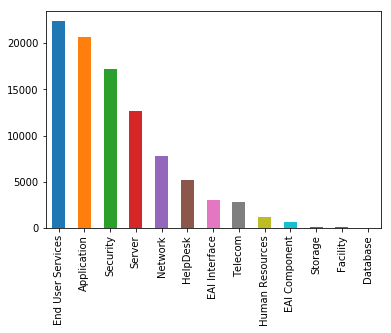

In [7]:
# plot few charts to understand the data

# Category by count - this should help understand "Number of Clusters" we should have

top_categories_df = df['Category'].value_counts()[:20]
top_categories_df.plot.bar(x = 'Category', y = 'Counts')

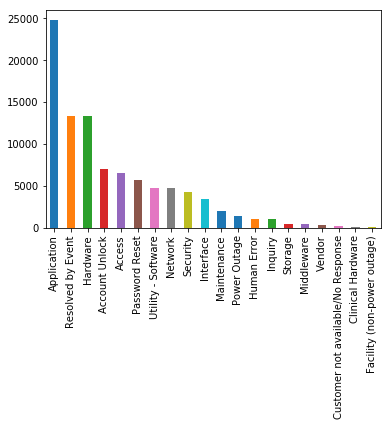

In [8]:
# Close_code by count 

top_close_code_df = df['Close_code'].value_counts()[:20]
top_close_code_df.plot.bar(x = 'Close_code', y = 'Counts')

In [9]:
# based on the 2 charts above we will go with 30 - 50 clusters of data

In [10]:
# identify the cols needed
cols = ['Number', 'Assignment_group', 'Priority', 'State', 'Category',
       'Subcategory', 'Severity', 'Closure_CI', 'Location', 'Close_code',
       'Configuration_item', 'Child_Incidents', 'Contact_type',
       'Duration', 'Impact', 'Short_description', 'Created']
df = df[cols]

In [11]:
# copy the dataframe to a new dataframe before any row deletes
test = df.copy()

In [12]:
# check for duplicate data
test[test['Short_description'].duplicated(keep = 'first')].sort_values('Short_description').head(5)

Number           Assignment_group Priority   State     Category  \
90835  INC0515090  DH-SW-EUS StRoseSanMartin  4 - Low  Closed     Security   
90786  INC0515038           DH-SC-EUS Marian  4 - Low  Closed     Security   
80005  INC0503959            DH-ClinApps HIM  4 - Low  Closed  Application   
80023  INC0503977            DH-ClinApps HIM  4 - Low  Closed  Application   
80137  INC0504096            DH-ClinApps HIM  4 - Low  Closed  Application   

      Subcategory Severity         Closure_CI  \
90835         NaN  3 - Low       McAfee Agent   
90786         NaN  3 - Low       McAfee Agent   
80005         NaN  3 - Low  Cerner CPDI Kofax   
80023         NaN  3 - Low  Cerner CPDI Kofax   
80137         NaN  3 - Low  Cerner CPDI Kofax   

                                      Location   Close_code  \
90835           Corporate Office - Phoenix GAT  Application   
90786           Corporate Office - Phoenix GAT   Middleware   
80005  Methodist Hospital of Sacramento (METH)  Application   
80023                Woodland Healthcare Davis  Application   
80137  Dignity Health Medical Group - Stockton  Application   

                              Configuration_item  Child_Incidents  \
90835                      McAfee AV, ASW or EPO                0   
90786                      McAfee AV, ASW or EPO                0   
80005                          Kofax Capture v11                0   
80023  Cerner Millennium Provider Doc 2015.01.19                0   
80137           Cerner Millennium HIM 2015.01.19                0   

       Contact_type  Duration                    Impact  \
90835         Phone    680806                 No Impact   
90786         Phone     69495                 No Impact   
80005         Phone      7047                 No Impact   
80023  Self-service      6784  Down for One IT Customer   
80137  Self-service      4816  Down for One IT Customer   

                                       Short_description             Created  
90835   "Notification Text: AMCORE out of Date <Works... 2018-10-29 13:55:41  
90786   "Notification Text: AMCORE out of Date <Works... 2018-10-29 13:34:39  
80005   Cerner CDI Work Queue Monitor - Not Receiving... 2018-10-23 09:15:30  
80023   Cerner CDI Work Queue Monitor - Not Receiving... 2018-10-23 09:19:22  
80137   Cerner CDI Work Queue Monitor - Not Receiving... 2018-10-23 09:51:46

In [13]:
# remove duplicates, we will still retain 1 row for analysis
test = test.drop_duplicates('Short_description', keep = 'first')
print('Shape of the modified dataframe ', test.shape)

Shape of the modified dataframe  (61556, 17)


In [14]:
#Filter out some categories with instances < 50 for now , remove this filter in future
# test = incs.groupby("Category").filter(lambda x: len(x) > 50)
# test = incs.reset_index(drop = True)
test.Category.value_counts()

Application          15482
End User Services    14859
Security             11327
Network               6114
Server                5805
HelpDesk              2779
Telecom               1267
EAI Interface         1186
Human Resources       1022
EAI Component          294
Storage                117
Facility                99
Database                 2
Name: Category, dtype: int64

In [15]:
pd.options.display.max_colwidth = 100

In [16]:
# remove any accent from letters
def unidecode_text(text):
    try:
        text = unidecode.unidecode(text)
    except:
        pass
    return text

for col in ['Location', 'Short_description']:
    test[col] = test.apply(lambda row: unidecode_text(row[col]), axis = 1)

In [40]:
# copy location to another data frame and remove duplicates
locations = test['Location']
locations = locations.drop_duplicates(keep = 'first')
locations.head()

0                        Corporate Office - Phoenix 1
1    St Mary's Medical Center San Francisco (SMMC-SF)
3                                  Bruceville Terrace
5               Marian Regional Medical Center (MRMC)
7                    Woodland Memorial Hospital (WMH)
Name: Location, dtype: object

In [41]:
# stop words for location

# nltk text preprocessing
import string
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import contractions

stop = stopwords.words('english')
lemmer = WordNetLemmatizer()

# add punctuations to the stop words
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop.extend(punc)

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def get_locations(text):

    # lower case
    text = text.lower()
#     text = text.str.lower()

    # replace '\', '/', '|', '-' with spaces, thes are usually entered to separate words
    # word tokenize doesn't tokenize on these
    text = re.sub(r'[.=\\/\|-]',' ', text)

    # replace contractions
    text = ' '.join(contractions.fix(word) for word in text.split())
#     text = text.apply(lambda x: ' '.join(contractions.fix(word) for word in x.split()))
    
    # tokenize text and remove puncutation, strip would remove from word begining or end
    text = [word.strip(string.punctuation) for word in word_tokenize(text)]
#     text = text.apply(lambda x: ' '.join(word.strip(string.punctuation) for word in word_tokenize(x)))
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
#     text = text.apply(lambda x: ' '.join(word for word in word_tokenize(x) if not any(c.isdigit() for c in word)))

    # remove small tokens
    text = [word for word in text if len(word) > 1]
#     text = text.apply(lambda x: ' '.join(word for word in word_tokenize(x) if len(word) > 1))
    
    # remove stop words
    text = [word for word in text if word not in set(stop)]
#     text = text.apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in set(stop)))
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [lemmer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
#     text = text.apply(lambda x: ' '.join(lemmer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tag(x)))
    
    text = ' '.join(text)
    
    return(text)
    
# locations_cleaned = get_locations(locations.astype(str))
locations_cleaned = locations.apply(lambda x: get_locations(str(x)))

In [42]:
locations_cleaned.head()

0                        corporate office phoenix
1    st mary medical center san francisco smmc sf
3                              bruceville terrace
5             marian regional medical center mrmc
7                  woodland memorial hospital wmh
Name: Location, dtype: object

In [43]:
# use the countvectorizer to convert to a list of words
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit_transform(locations_cleaned.values)

stop_locations = vectorizer.get_feature_names()
len(stop_locations)

500

In [44]:
stop_locations[100:110]

['de',
 'deactivate',
 'department',
 'detention',
 'development',
 'dhmf',
 'dhmg',
 'dhmgn',
 'dhmso',
 'diabetes']

In [106]:
# extend stop words
# words like issue, problem, resolve, fix - do not add more sense to the description and are common
new_stopwords = ['chw','edu','phx','vapp', 'issue', 'issues', 'problem', 'problems', 
                 'resolve', 'resolved', 'fix', 'fixed']

stop.extend(new_stopwords)

# add the locations to the stop words
stop.extend(stop_locations)


def pre_process(text):

    # lower case
    text = text.lower()

    # replace '\', '/', '|', '-' with spaces, thes are usually entered to separate words
    # word tokenize doesn't tokenize on these
    text = re.sub(r'[.=\\/\|-]',' ', text)

    # replace contractions
    text = ' '.join([contractions.fix(word) for word in text.split()])

    # "'d": changes to " would", 'disk changes to wouldisk - unwanted contraction
    # replace wouldisk with disk
    text = text.replace('wouldisk', 'disk')  # replace with disk    

    # 'not able' is a common way to report issue, replace 'not able' with 'unable'
    # also not gets removed as part of stop words
    text = text.replace('not able', 'unable')
    text = text.replace('user id', 'user')
    text = text.replace('username', 'user')
    
    # replace ms4 to medseries
    text = text.replace('ms4', 'medseries')
    
    # there are lot of places in the description where II (2 caps I) has been used as separator
    # this gets converted to small letter (ii) with high occurance, drop these letters
    text = text.replace(' ii ', ' ')  # replace with spaces
        
    # tokenize text and remove puncutation, strip would remove from word begining or end
    text = [word.strip(string.punctuation) for word in word_tokenize(text)]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]

    # remove small tokens
    text = [word for word in text if len(word) > 2]
    
    # remove stop words
    text = [word for word in text if word not in set(stop)]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [lemmer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # some verbs probably get tagged as noun and are not lemmatized
    text = [lemmer.lemmatize(word, pos = 'v') for word in text]
    
    text = ' '.join(text)    
  
    return (text)
    
# cleaned_short_desc = pre_process(incs['Short_description'].astype(str))
%time cleaned_short_desc = test['Short_description'].apply(lambda x: pre_process(x))

CPU times: user 1min 17s, sys: 1.19 s, total: 1min 19s
Wall time: 1min 19s


In [107]:
cleaned_short_desc[0:20]

0                                   utilization threshold set disk file percent full
1                                                     account lock unable login user
2                                                                                   
3                                                                     password reset
4                              clairvia unable login password reset hduv do jmoyrong
5                                             account lock unable login user jyongco
6                              error message appear open cash_adjs clpdayend qrgxmsg
7                                            wow display leave monitor upside device
8                                          cpu utilization threshold set utilization
9                                                receive cash_adjs clpdayend qclxerr
10                                         cpu utilization threshold set utilization
11                                         cpu utilization thresh

In [108]:
# count of cells with no terms
print(cleaned_short_desc.apply(lambda x: x == '').sum())

75


In [109]:
def get_ips(text):
    
    # lower case
    text = text.str.lower()
    
    # capture the IPs    
    ip_pattern = re.compile(r'((-?)([A-Za-z0-9]{1,}[-.]{1,1}){2,6}([A-Za-z0-9]*))')  
    ip = text.apply(lambda x: ' '.join(word for word in re.split('[\': (),]', x) if ip_pattern.match(word)))
    
    return ip

ips = get_ips(test['Short_description'])

In [110]:
ips[0:20]

0                phx-vapp-689.chw.edu
1                                    
2                        phx-vapp-408
3                                    
4                                    
5                                    
6                                    
7                       10.203.212.24
8                phx-vapp-842.chw.edu
9                                    
10               phx-vapp-237.chw.edu
11               phx-vapp-238.chw.edu
12                      -10.248.84.17
13    chw-as1-2central-dsc 10.1.5.100
14     chw-as2-2central-dsc 10.1.5.10
15                phx-app-040.chw.edu
16                phx-app-034.chw.edu
17                                   
18                    phxdc23c-nas-07
19         chw-as1-2west-dsc 10.1.5.6
Name: Short_description, dtype: object

In [111]:
# add the processed text and extracted ips to dataframe
test['Terms'] = cleaned_short_desc
test['IPs'] = ips

In [112]:
# drop the rows where 'Terms' column is spaces
# test = test[test['Terms'] != '']

In [113]:
# this cell is just for testing regex, etc
# import re

# print(re.split('[:\' ]', '\'phx-vapp-689.chw.edu\': Utilization is \'85.2\'. Threshold is set to \'Disk/File System/{C}/percent full >= 85\''))

# ip_pattern = re.compile(r'((-?)([A-Za-z0-9]{1,}[-.]{1,1}){2,6}([A-Za-z0-9]*))') 

# print(ip_pattern.match('phx-vapp-238.chw.edu'))
# print(ip_pattern.match('CPU Utilization is '))
# print(ip_pattern.match('85.2'))
# print(ip_pattern.match('10.250.243.2'))
# print(ip_pattern.match('-10.248.84.17'))
# print(ip_pattern.match('192.168.2.85)'))
# print(ip_pattern.match('10.1.5.100'))


# test = pd.DataFrame({'strings': ['...', 'a(b$c']})
# test.strings.str.replace('[^a-zA-Z ]', ' ')

# print('This is a test in spite.'.split())
# print(lemmer.lemmatize('physicians', pos='v'))
# text = "SMMC-////\\\\_||||==SF sdcchmc_lis.chw.edu"
# text = re.sub(r'[.=\\/\|-]',' ', text)
# print(text)

# alpha = re.compile(r'([A-Za-z/\-]*$)')

# dk = pd.DataFrame({'sentences': ['This is a very MS4 ABCD901 \'abc.xyz.109.01\' good site. I will recommend it to others.', 
#                                  'Can you please give me a call at 9983938428. have issues with the listings.', 
#                                  'WOW / Workstation on Wheels || WOW / Workstation on Wheels Issue',
#                                  '\'phx-vapp-689.chw.edu\': Utilization is \'85.2\'. Threshold is set to \'Disk/File System/{C}/percent full >= 85',
#                                  'Clairvia/not able to login//password reset hduv done jmoyrong/issue resolved',
#                                  'God is Great/I won a lottery.',
#                                  'CIM_2_BAYDSC19_MSFCHGX:MSF19CHGX:MedSeries 4:TIER-2 P05:DESTINATION_REALTIME:No host at ipAddress -10.248.84.17, listening on port -21529. :Charges - Multiple t',
#                                  'Account Lock ||  Not able to login || user id-adeperalta001',
#                                  'good work! keep it up, couldn\'t able to login, couldn\'t connect']})

# dk['tokenized_sents']  = dk['sentences'].apply(lambda x: ' '.join(word for word in re.split('[\': (),]', x) if ip_pattern.match(word)))



# dk['tokenized_sents'] = dk['sentences'].apply(lambda x: ' '.join(word.lower() for word in x.split()))  # lower case
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join(contractions.fix(word) for word in x.split()))  # replace contractions

# dk['tokenized_sents'] = dk['tokenized_sents'].str.replace('not able', 'unable')
# dk['tokenized_sents'] = dk['tokenized_sents'].str.replace('[\/-]', ' ')  # replace them with spaces

# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if alpha.match(word)))
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join([lemmer.lemmatize(word, pos='v') for word in word_tokenize(x)]))       #lemma
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in set(stop)]))   #stop

# print(dk['tokenized_sents'])

In [114]:
# view the terms column just before feature extraction
test['Terms'][1470:1490]

1787                                active job complete exit status
1788                                   tac mdf eigrp peer disappear
1789                                active job complete exit status
1790                                active job complete exit status
1791                                active job complete exit status
1794                      cpu utilization threshold set utilization
1795     jennifer delcid emc power supply replacement serial number
1796                                 account account lock user name
1797                              account unable log user lock user
1798        account password reset user name hduv do reset password
1801             java window prompt come installation devid restart
1802                        austin maley avasys need restart server
1807                              medseries password reset nkessler
1808                          medseries unable login unlock jespino
1809               utilization threshold set dis

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(max_features=10000, max_df=0.8, min_df=0.0005,                                  
#                                   use_idf=True, tokenizer=word_tokenize, ngram_range=(1,3))

vectorizer = TfidfVectorizer(max_features = 5000, # stop_words = stop,                               
                                  use_idf = True, tokenizer = word_tokenize, ngram_range = (1,1))

%time X = vectorizer.fit_transform(test['Terms'].values)

print(X.shape)

CPU times: user 6.49 s, sys: 16.5 ms, total: 6.51 s
Wall time: 6.51 s
(61556, 5000)


In [116]:
features = vectorizer.get_feature_names()
freq = sum(X).toarray()[0]
test_features = pd.DataFrame(freq, index = features, columns = ['frequency'])

# sort the terms in descending order of frequency
test_features.sort_values(by = ['frequency'], inplace = True, ascending = False)

In [117]:
# print the top 50 occurances
print(test_features[0:50])

               frequency
unable       3831.747402
user         3799.663947
login        3466.864680
account      2713.350064
password     1816.322310
lock         1541.458693
reset        1539.339299
need         1449.472727
device       1427.830581
mdf          1286.895290
dev          1261.537961
medseries    1161.910415
main         1084.988066
printer      1073.278512
status       1049.887113
cerner       1027.791573
error         960.675172
access        954.539932
utilization   888.566541
computer      888.351278
job           886.339362
do            884.477536
unlock        850.515055
up            845.948659
desktop       845.884584
smart         840.723048
set           832.579696
file          781.567739
able          775.905074
work          765.425471
duo           754.539556
threshold     737.986152
hduv          736.309056
associate     682.672784
controller    680.754554
print         643.721278
full          639.080918
complete      626.413951
loc           621.873712


In [118]:
# print the last 20 occurances - terms with low frequency
# how low is the frequency? do we have correct number of features
print(test_features.tail(20))

            frequency
gmhmed       0.681759
ipa          0.671874
junk         0.664677
sell         0.658289
synonym      0.655643
ri           0.654936
woodrd       0.646431
nvnlv        0.642154
nvbd         0.641287
rlenz        0.639648
sbmcclin     0.634918
speechq      0.630863
ssrnet       0.607296
hambleton    0.603334
reaso        0.580431
smartwrite   0.573038
sakuru       0.573038
httpd        0.554465
httpserver   0.528130
sophia       0.521252


In [120]:
print(features[4900:5000])

['workplace', 'workroom', 'worksheet', 'workstation', 'world', 'wou', 'would', 'wouldh', 'wouldsc', 'woundcare', 'woundexpert', 'wow', 'wpo', 'wpobre', 'wpot', 'wqm', 'wright', 'wrinkle', 'wrist', 'wristband', 'write', 'writer', 'wroking', 'wrong', 'wrongly', 'wrwill', 'wsarkis', 'wsiebert', 'wts', 'wvillanueva', 'www', 'xcalderon', 'xcelera', 'xen', 'xenapp', 'xenn', 'xerox', 'xlarchve', 'xlbackup', 'xlcube', 'xlcubed', 'xlin', 'xmatters', 'xml', 'xnguyen', 'xper', 'xpercon', 'xray', 'xrays', 'xtend', 'xtra', 'xxi', 'yaguda', 'yahoo', 'yan', 'yarbrough', 'yasuko', 'ycabas', 'ycabasantana', 'year', 'yellow', 'yes', 'yesterday', 'yet', 'ygee', 'ykamto', 'ymadkins', 'ynguyengar', 'ynunez', 'yolo', 'yosemite', 'youtube', 'yparamo', 'ypetrishin', 'yporter', 'ysessions', 'yun', 'yvette', 'zapata', 'zara', 'zary', 'zda', 'zebra', 'zelkhoury', 'zen', 'zenapp', 'zero', 'zhang', 'ziedler', 'ziegelmayer', 'zimportdb', 'zip', 'zjaleco', 'zlegaspi', 'zone', 'zoom', 'zother', 'zrosado', 'zweingarte

In [121]:
# using elbow method to find optimum number of clusters - start with 30 clusters

# from sklearn.cluster import KMeans
# wcss = []

# for i in range(30, 51):
#     km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 1)
#     km.fit(X)
#     wcss.append(km.inertia_)
 
# optimal_clusters = np.argmin(wcss) + 2 # As argmin return the index of minimum loss.

# plt.plot(range(30, 51), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

# print ("The optimal number of clusters obtained is - ", optimal_clusters)
# print ("The loss for optimal cluster is - ", min(wcss))

In [122]:
num_clusters = 50

# KMeans
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
# %time y = kmeans.fit_predict(X)
# %time kmeans.fit(X)

# Mini Batch KMeans
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters = num_clusters, init = 'k-means++', 
                         max_iter = 300, n_init = 3, random_state = 1)
%time kmeans.fit(X)

# clusters = kmeans.labels_.tolist()

CPU times: user 1 s, sys: 3.56 ms, total: 1.01 s
Wall time: 1.01 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=300, max_no_improvement=10, n_clusters=50,
        n_init=3, random_state=1, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [123]:
# check the number of rows in data frame and the labels
print(len(kmeans.labels_))
print(test.shape)

61556
(61556, 20)


In [124]:
# copy the kmeans.labels_ as Cluster column
test['Cluster'] = kmeans.labels_

In [125]:
# print terms to cluster mapping
print(test.loc[:10,['Terms', 'Cluster']])

                                                    Terms  Cluster
0        utilization threshold set disk file percent full       46
1                          account lock unable login user       33
2                                                                1
3                                          password reset       35
4   clairvia unable login password reset hduv do jmoyrong       39
5                  account lock unable login user jyongco       33
6   error message appear open cash_adjs clpdayend qrgxmsg       31
7                 wow display leave monitor upside device       25
8               cpu utilization threshold set utilization       48
9                     receive cash_adjs clpdayend qclxerr       45
10              cpu utilization threshold set utilization       48


In [126]:
# Save cluster in pickle file for future use
# import pickle

# pickle.dump(km, open('pkl/km_1.pkl', 'wb'))

In [127]:
# order_centroids = kmeans.cluster_centers_.argsort()[:,-1:-51:-1]
# for num, centroid in enumerate(order_centroids):
#     print(str(num) + ' : ' + ', '.join(features[word] for word in centroid))
    
# Create mapping of ngram features into clusters, 
# save into terms map object with key as cluster name (first feature in each cluster - with 2 words)
# terms = top 50 ngram features

order_centroids = kmeans.cluster_centers_.argsort()[:, :51:-1]

terms_map = pd.DataFrame(index = np.arange(0, num_clusters), columns = ['features','key'])    
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    #terms_map['key'] = i
    list = [] 
    for ind in order_centroids[i, :50]:
        print(' %s' % features[ind], end=',')
        list.append(features[ind])
    for ind2 in order_centroids[i, :1]:
        terms_map.key.loc[i] = features[ind2]

    str = ', '.join(list) 
    terms_map.features.loc[i] = str
    print()
print(terms_map.shape)

Cluster 0: cerner, powerchart, temperature, unable, value, high, port, ecisa, careb, login, user, sensor, temp, print, smart, up, scan, firstnet, unreachable, order, cross, miss, surginet, chart, device, dev, need, icon, introduction, report, account, list, show, application, pop, pathnet, track, name, discharge, emergency, information, patient, error, access, schedule, bridge, freeze, dmf, interface, charge,
Cluster 1: unable, error, user, need, phone, device, miss, outlook, work, port, round, status, laptop, mdf, dev, email, time, monitor, scanner, get, power, interface, see, call, reboot, report, icon, screen, main, login, encryption, ping, account, humidity, info, additional, percentage, packet, print, scan, test, supply, critical, log, tier, syslog, send, receive, fail, value,
Cluster 2: login, unable, user, encryption, account, able, dev, pass, es, mcafee, hold, lawson, yes, password, nfuse, hduv, time, journey, enable, apache, cerner, one, clairvia, laptop, boot, end, credential

Cluster 37: gecb, unable, sac, error, user, exception, login, handler, access, dev, account, lock, get, device, etm, schedule, password, centricity, launch, message, flowcast, print, pull, receipt, reset, appointment, log, application, uid, view, limit, record, session, fatal, impact, reprint, patient, reach, enable, clear, net, end, prod, scanner, installation, work, optimize, say, instal, loc,
Cluster 38: userid, lock, account, login, unable, medseries, clairvia, disable, gecb, unlock, cerner, first, time, jpinlac, slowery, ffragoso, powerchart, desktop, gvu, allscripts, sbendah, ttheodoreedevu, name, jibalio, apache, meditech, get, reward, total, formfast, devid, lhairston, lgil, ypetrishin, imate, vzill, zelkhoury, jlin, rramachandran, jlpiercy, sly, rruelas, surginet, soarian, idx, computer, teletracking, mcafee, device, enup,
Cluster 39: do, password, login, hduv, reset, able, user, unable, account, hold, yes, customer, invision, uid, change, medseries, buddy, incorrect, apache, 

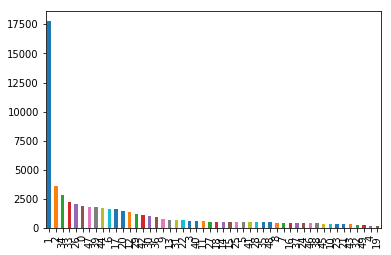

In [128]:
# analyze the clusters
top_clusters = test['Cluster'].value_counts()
top_clusters.plot.bar(x = 'Cluster', y = 'Counts')

In [129]:
# there is high volume for cluster 1, look at few to investigate
print(test[test.Cluster == 1].iloc[:10, [15,17,18,19]])

                                                                                      Short_description  \
2                                                                              PHX-VAPP-408 - SAC0 MGH0   
13                          MASTER // nmscust02-2 : CHW-as1-2central-dsc : 10.1.5.100 : Syslog Critical   
14                                     nmscust02-2 : CHW-as2-2central-dsc : 10.1.5.10 : Syslog Critical   
17                                                   MEDITECH ALERT (HIGH)                                
19                                         nmscust02-2 : CHW-as1-2west-dsc : 10.1.5.6 : Syslog Critical   
24  CIM_2_MCD95_HCLORDL:HCL99ORDL:HCCL:TIER-2:DESTINATION_REALTIME:Try 1 to receive the response fro...   
28  CIM_2_BAYDSC19_OMNADT:OMN19ADT:Omnicell:TIER-0:DESTINATION_REALTIME:Try 1 to receive the respons...   
30                                                                My journey performance and evaluation   
41  PHXASP08 RNQ1218 Unable to alloca